Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

**1.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [1]:
import pandas as pd
import numpy as np

data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df=pd.DataFrame(data,index=labels)
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**2.** Display a summary of the basic information about this DataFrame and its data (*hint: there is a single method that can be called on the DataFrame*).

In [2]:
df.describe()

,age,visits
count,8.000000,10.000000
mean,3.437500,1.900000
std,2.007797,0.875595
min,0.500000,1.000000
25%,2.375000,1.000000
50%,3.000000,2.000000
75%,4.625000,2.750000
max,7.000000,3.000000


**3.** Return the first 3 rows of the DataFrame `df`.

In [3]:
df.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


**4.** Display the 'animal' and 'age' columns from the DataFrame `df`

In [4]:
df[['animal','age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


**5.** Display the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']'

In [5]:
df.loc[['d','e','i'],['animal','age']]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


**6.** Select only the rows where the number of visits is greater than 3.

In [6]:
df[df['visits']>3]

,animal,age,visits,priority


**7.** Select the rows where the age is missing, i.e. it is `NaN`.

In [7]:
df[df['age'].isnull()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


**8.** Select the rows where the animal is a cat *and* the age is less than 3.

In [8]:
df[(df['animal']=='cat') & (df['age']<3)]


,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


**9.** Select the rows where the age is between 2 and 4 (inclusive)

In [9]:
df[(df['age']>=2) & (df['age']<=4)]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


**10.** Change the age in row 'f' to 1.5.

In [10]:
df.loc['f','age']=1.5
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**11.** Calculate the sum of all visits in `df` (i.e. the total number of visits).

In [11]:
total_visits=df['visits'].sum()
print("sum of all visits in = ",total_visits)

sum of all visits in =  19


**12.** Calculate the mean age for each different animal in `df`.

In [12]:
df.groupby('animal')['age'].mean()

,age
animal,
cat,2.333333
dog,5.000000
snake,2.500000


**13.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [13]:
df.loc['k']=['cat',3,2,'yes']
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**14.** Count the number of each type of animal in `df`.

In [14]:
df['animal'].value_counts()

,count
animal,
cat,5
dog,4
snake,2


**15.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visits' column in *ascending* order (so row `i` should be first, and row `d` should be last).

In [15]:
df.sort_values(by=['age','visits'],ascending=[False,True])

,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
k,cat,3.0,2,yes
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,1.5,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes


**16.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [16]:
df['priority'] = df['priority'].map({'yes': "True", 'no': "False"})
df

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,snake,0.5,2,False
d,dog,NaN,3,True
e,dog,5.0,2,False
f,cat,1.5,3,False
g,snake,4.5,1,False
h,cat,NaN,1,True
i,dog,7.0,2,False
j,dog,3.0,1,False


**17.** In the 'animal' column, change the 'snake' entries to 'python'.

In [17]:
df['animal'].replace("snake", "python")
df

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,snake,0.5,2,False
d,dog,NaN,3,True
e,dog,5.0,2,False
f,cat,1.5,3,False
g,snake,4.5,1,False
h,cat,NaN,1,True
i,dog,7.0,2,False
j,dog,3.0,1,False


**18.** Load the ny-flights dataset to Python

In [18]:
df_ny_flights=pd.read_csv('ny-flights.csv')
df_ny_flights.head()

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
0,2014-01-01 00:00:00,AA,19805,N338AA,1,JFK,LAX,914.0,14.0,1238.0,13.0,0.0,2014-01-01 12:38:00,2014-01-01 09:14:00
1,2014-01-01 00:00:00,AA,19805,N335AA,3,JFK,LAX,1157.0,-3.0,1523.0,13.0,0.0,2014-01-01 15:23:00,2014-01-01 11:57:00
2,2014-01-01 00:00:00,AA,19805,N327AA,21,JFK,LAX,1902.0,2.0,2224.0,9.0,0.0,2014-01-01 22:24:00,2014-01-01 19:02:00
3,2014-01-01 00:00:00,AA,19805,N3EHAA,29,LGA,PBI,722.0,-8.0,1014.0,-26.0,0.0,2014-01-01 10:14:00,2014-01-01 07:22:00
4,2014-01-01 00:00:00,AA,19805,N319AA,117,JFK,LAX,1347.0,2.0,1706.0,1.0,0.0,2014-01-01 17:06:00,2014-01-01 13:47:00


**19.** Which airline ID is present maximum times in the dataset

In [19]:
count = df_ny_flights['airline_id'].value_counts()
count.head(1)

,count
airline_id,
20409,4902


**20.** Draw a plot between dep_delay and arr_delay

 From the plot, we can see a strong positive correlation between 'departure delay' and 'arrival delay'


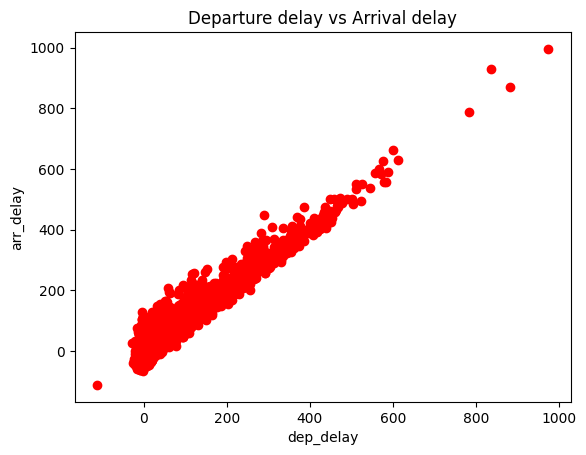

In [20]:
import matplotlib.pyplot as plt
plt.scatter(df_ny_flights['dep_delay'],df_ny_flights['arr_delay'], c='r')
plt.xlabel('dep_delay')
plt.ylabel('arr_delay')
plt.title('Departure delay vs Arrival delay')
plt.show


print(" From the plot, we can see a strong positive correlation between 'departure delay' and 'arrival delay'")

**21.** Draw a plot showing frequency of flights

<Axes: title={'center': 'Frequency of flights(including cancelled flights)'}, xlabel='Airline Id'>

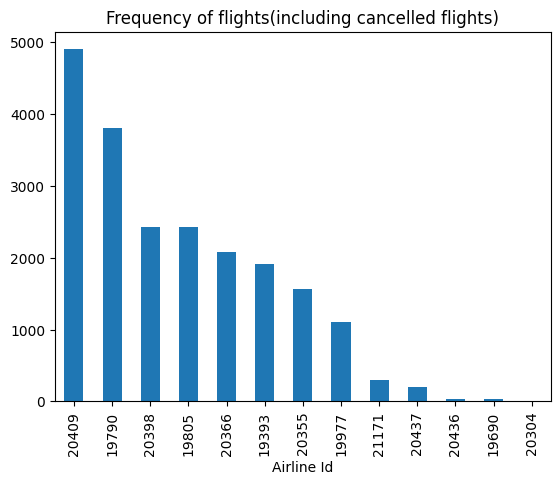

In [21]:
df_ny_flights['airline_id'].value_counts().plot(kind='bar', xlabel="Airline Id", title="Frequency of flights(including cancelled flights)")

**22.** Draw a histogram showing which airline cancels the most

<Axes: title={'center': 'Frequency of non cancelled flights'}, xlabel='Airline Id'>

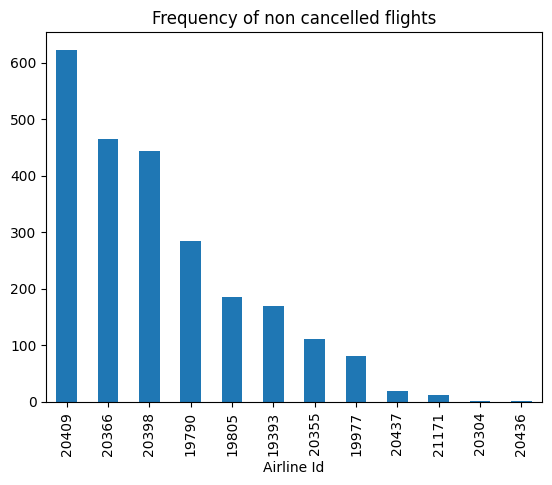

In [22]:
df_ny_flights.loc[df_ny_flights['cancelled']==1,'airline_id'].value_counts().plot(kind='bar',  xlabel="Airline Id", title="Frequency of non cancelled flights")

**23.** Clean the data

In [23]:
print(df_ny_flights.isnull().sum())
df_ny_flights.dtypes
# assuming 'cancelled' column is boolean ( 0 for not cancelled, 1 for cancelled )
# if 'cancelled' = 1, having no value for 'tail_num', 'dep_time', 'dep_delay', 'arr_time', 'arr_delay', 'arr' and 'dep' are acceptable.
# if 'cancelled' = 0, having no value for 'dep_delay', 'arr_delay' would mean the values for them are '0'. rest has to be omitted.

# rreplacing the possible values with 0.
df_ny_flights.loc[df_ny_flights['dep_delay'].isnull() & df_ny_flights['cancelled']==0, 'dep_delay'] = 0
df_ny_flights.loc[df_ny_flights['arr_delay'].isnull() & df_ny_flights['cancelled']==0, 'arr_delay'] = 0

# Delete all rows with column 'cancelled' = 0 and other column value as null
indexToDrop = df_ny_flights[ (df_ny_flights['cancelled']==0) & (df_ny_flights['tail_num'].isnull()) ].index
df_ny_flights.drop(indexToDrop , inplace=True)
indexToDrop = df_ny_flights[ (df_ny_flights['cancelled']==0) & (df_ny_flights['dep_time'].isnull()) ].index
df_ny_flights.drop(indexToDrop , inplace=True)
indexToDrop = df_ny_flights[ (df_ny_flights['cancelled']==0) & (df_ny_flights['dep_delay'].isnull()) ].index
df_ny_flights.drop(indexToDrop , inplace=True)
indexToDrop = df_ny_flights[ (df_ny_flights['cancelled']==0) & (df_ny_flights['arr_time'].isnull()) ].index
df_ny_flights.drop(indexToDrop , inplace=True)
indexToDrop = df_ny_flights[ (df_ny_flights['cancelled']==0) & (df_ny_flights['arr_delay'].isnull()) ].index
df_ny_flights.drop(indexToDrop , inplace=True)
indexToDrop = df_ny_flights[ (df_ny_flights['cancelled']==0) & (df_ny_flights['arr'].isnull()) ].index
df_ny_flights.drop(indexToDrop , inplace=True)
indexToDrop = df_ny_flights[ (df_ny_flights['cancelled']==0) & (df_ny_flights['dep'].isnull()) ].index
df_ny_flights.drop(indexToDrop , inplace=True)

print(df_ny_flights.isnull().sum())
print( " now only cancelled flight data has null values. ")


fl_date              0
unique_carrier       0
airline_id           0
tail_num           305
fl_num               0
origin               0
dest                 0
dep_time          2355
dep_delay         2355
arr_time          2405
arr_delay         2434
cancelled            0
arr               2405
dep               2355
dtype: int64
fl_date              0
unique_carrier       0
airline_id           0
tail_num           305
fl_num               0
origin               0
dest                 0
dep_time          2355
dep_delay         2355
arr_time          2395
arr_delay         2395
cancelled            0
arr               2395
dep               2355
dtype: int64
 now only cancelled flight data has null values. 


**24.** Draw the histogram of Arrival time and departure time and give observations

 From the Histogram, We can conclude that most flights depart around 9 Am and most flight reach their destination around 10 AM
 flight travel is almost very less during 12 AM - 5 AM


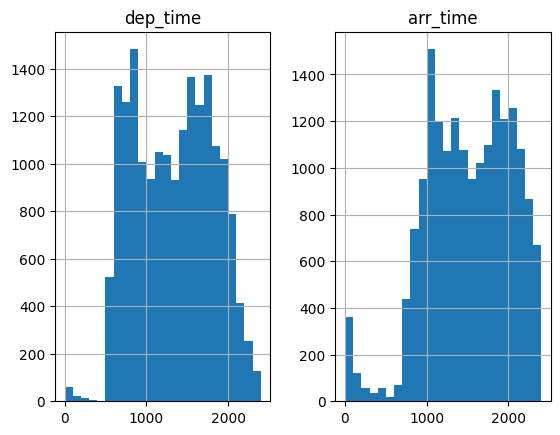

In [24]:
import seaborn as sns
df_orig_dest = df_ny_flights[['dep_time','arr_time']]

hist = df_orig_dest.hist(bins=24)

print(" From the Histogram, We can conclude that most flights depart around 9 Am and most flight reach their destination around 10 AM")
print( " flight travel is almost very less during 12 AM - 5 AM")


**25.**